In [11]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Win11\Downloads\synthetic_customer_churn.csv")
print(data.shape)


(200, 10)


🔸 Dataset shape: (200, 10)

🔸 Column names:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

🔸 Data types:
 customerID         object
gender             object
SeniorCitizen       int64
Partner            object
Dependents         object
tenure              int64
PhoneService       object
MonthlyCharges    float64
TotalCharges      float64
Churn              object
dtype: object

🔸 Missing values:
 customerID        0
gender            0
SeniorCitizen     0
Partner           0
Dependents        0
tenure            0
PhoneService      0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

🔸 Churn Value Counts:
 Churn
No     179
Yes     21
Name: count, dtype: int64


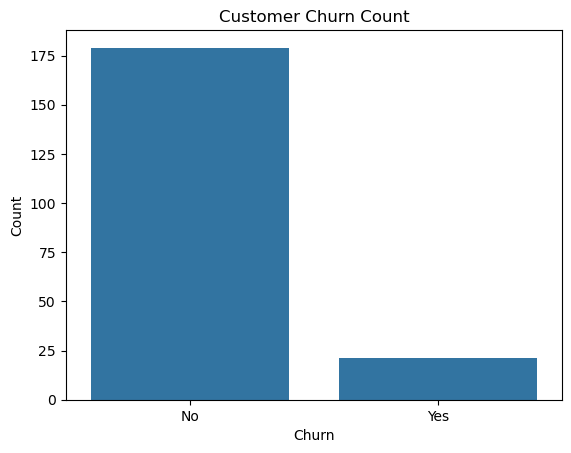

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print("🔸 Dataset shape:", data.shape)
print("\n🔸 Column names:\n", data.columns)
print("\n🔸 Data types:\n", data.dtypes)
print("\n🔸 Missing values:\n", data.isnull().sum())

# Class balance (Churned or Not)
print("\n🔸 Churn Value Counts:\n", data['Churn'].value_counts())

# Plot class distribution
sns.countplot(x='Churn', data=data)
plt.title("Customer Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [13]:
data.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,200.000000,200.000000,200.000000,200.000000
mean,0.175000,34.495000,69.976350,2374.753300
std,0.380921,21.386841,29.632827,1871.469807
min,0.000000,0.000000,21.100000,0.000000
25%,0.000000,16.000000,44.612500,824.347500
50%,0.000000,33.000000,69.245000,2033.465000
75%,0.000000,54.000000,96.747500,3612.455000
max,1.000000,71.000000,119.790000,7936.380000


In [14]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset
df = data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode all categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print("✅ All categorical columns converted to numeric.")
df.head()


✅ All categorical columns converted to numeric.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,62,1,43.82,2716.84,0
1,1,0,0,0,0,16,1,29.94,479.04,0
2,2,1,0,0,1,32,1,44.32,1418.24,0
3,3,1,0,0,1,28,1,92.23,2582.44,0
4,4,1,1,1,0,12,1,105.57,1266.84,0


In [15]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Dataset split into training and testing sets.")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


✅ Dataset split into training and testing sets.
Training set: (160, 9)
Testing set: (40, 9)


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

print("✅ Model training complete.")


✅ Model training complete.


In [18]:
# Predict on test set
y_pred = model.predict(X_test)

print("✅ Predictions completed.")


✅ Predictions completed.


✅ Predictions completed.
Accuracy: 0.65
Confusion Matrix:
[[ 8  8]
 [ 6 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.69      0.75      0.72        24

    accuracy                           0.65        40
   macro avg       0.63      0.62      0.63        40
weighted avg       0.64      0.65      0.65        40



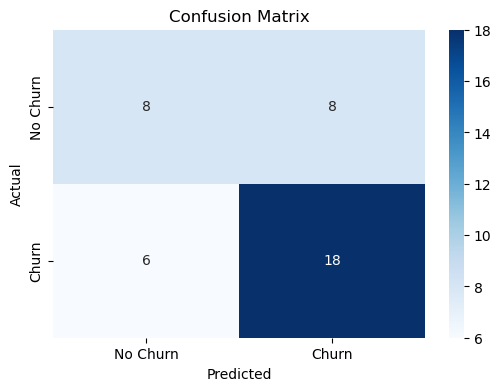

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create data
np.random.seed(42)
n = 200
data = pd.DataFrame({
    'customerID': [f'CUST{i:03d}' for i in range(1, n+1)],
    'gender': np.random.choice(['Male', 'Female'], n),
    'SeniorCitizen': np.random.choice([0,1], n, p=[0.85, 0.15]),
    'Partner': np.random.choice(['Yes', 'No'], n),
    'Dependents': np.random.choice(['Yes', 'No'], n),
    'tenure': np.random.randint(0, 72, n),
    'PhoneService': np.random.choice(['Yes', 'No'], n, p=[0.9, 0.1]),
    'MonthlyCharges': np.round(np.random.uniform(20, 120, n), 2),
})
data['TotalCharges'] = np.round(data['tenure'] * data['MonthlyCharges'], 2)
data.loc[:99, 'Churn'] = 'Yes'
data.loc[100:, 'Churn'] = np.where(
    (data.loc[100:, 'tenure'] < 12) & (data.loc[100:, 'MonthlyCharges'] > 70), 'Yes', 'No'
)

# Step 2: Prepare features and target
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

y = y.map({'No': 0, 'Yes': 1})

# Step 3: Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Predict churn on test set
y_pred = model.predict(X_test)
print("✅ Predictions completed.")

# Step 6: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: (Optional) Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.625


In [6]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=1000)

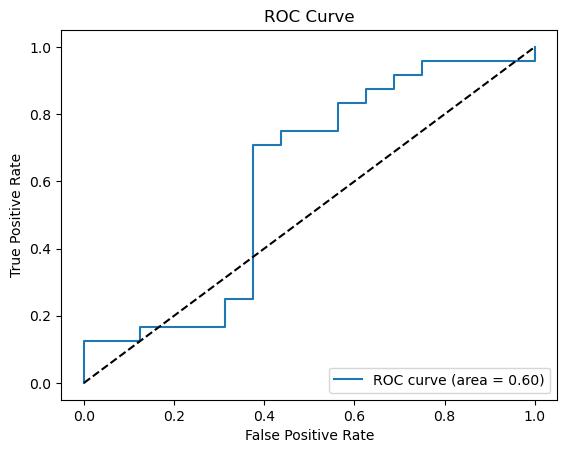

In [7]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


✅ Random Forest Predictions completed.
Random Forest Accuracy: 0.62
Confusion Matrix:
[[10  6]
 [ 9 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        16
           1       0.71      0.62      0.67        24

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.64      0.62      0.63        40



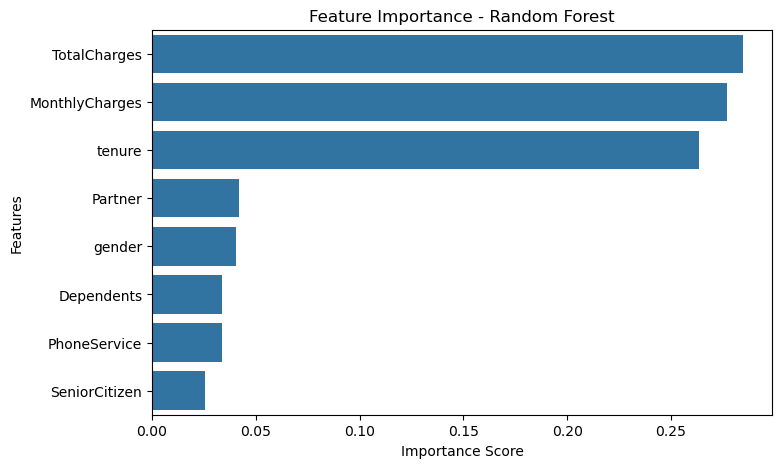

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
print("✅ Random Forest Predictions completed.")

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature Importance Plot
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]             # Minimum samples at leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use best estimator to predict
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate best model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Accuracy: 0.68
Confusion Matrix:
[[12  4]
 [ 9 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.75      0.65        16
           1       0.79      0.62      0.70        24

    accuracy                           0.68        40
   macro avg       0.68      0.69      0.67        40
weighted avg       0.70      0.68      0.68        40



In [12]:
# Make a copy of X_test to add predictions and actual labels
X_test_copy = X_test.copy()

# Add actual churn values
X_test_copy['ActualChurn'] = y_test.values

# Add predicted churn values
X_test_copy['PredictedChurn'] = y_pred

# Map 0/1 back to No/Yes for readability
X_test_copy['ActualChurn'] = X_test_copy['ActualChurn'].map({0: 'No', 1: 'Yes'})
X_test_copy['PredictedChurn'] = X_test_copy['PredictedChurn'].map({0: 'No', 1: 'Yes'})



In [13]:
X_test_copy.to_csv('churn_predictions_for_powerbi.csv', index=False)
print("CSV file saved successfully!")


CSV file saved successfully!


In [14]:
import os
print(os.getcwd())


C:\Users\Win11
